# 마라톤 데이터셋 EDA 시작

이 노트북에서는 `FINAL_marathons_with_weather.csv` 데이터를 기반으로 EDA를 진행합니다.

In [61]:
import pandas as pd

# 데이터 불러오기
file_path = './real_final/FINAL_marathons_with_weather.csv'
df = pd.read_csv(file_path)
df.shape

(114612, 26)

## 1. 기본 정보 확인
- 행/열 수
- 컬럼별 결측치 확인
- 데이터 타입 확인

In [62]:
# 컬럼별 결측치 수 확인
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

5p       123
5K       123
10p       16
10K       16
15p       12
15K       12
Halfp      8
Half       8
25p        7
25K        7
30p        6
30K        6
35p        5
40p        5
35K        5
40K        5
dtype: int64

In [63]:
# 데이터 타입 확인
df.dtypes

Bib                   int64
Age_group             int64
M/F                   int64
Country              object
5p                  float64
10p                 float64
15p                 float64
Halfp               float64
25p                 float64
30p                 float64
35p                 float64
40p                 float64
Final_Time          float64
Sub                   int64
5K                  float64
10K                 float64
15K                 float64
Half                float64
25K                 float64
30K                 float64
35K                 float64
40K                 float64
Dataset              object
Year                  int64
temperature_race    float64
humidity_race       float64
dtype: object

In [64]:
# 상위 5개 행 출력
df.head()

,Bib,Age_group,M/F,Country,5p,10p,15p,Halfp,25p,30p,...,15K,Half,25K,30K,35K,40K,Dataset,Year,temperature_race,humidity_race
0,1,29,0,ETH,176.0,178.0,179.0,182.0,182.0,184.0,...,2697.0,3842.0,4567.0,5520.0,6479.0,7359.0,B,2015,7.0875,87.75
1,2,34,0,ETH,176.0,178.0,179.0,182.0,182.0,183.0,...,2698.0,3841.0,4567.0,5519.0,6479.0,7362.0,B,2015,7.0875,87.75
2,3,29,0,KEN,176.0,178.0,179.0,182.0,182.0,184.0,...,2697.0,3842.0,4567.0,5520.0,6479.0,7381.0,B,2015,7.0875,87.75
3,4,29,0,KEN,176.0,178.0,180.0,182.0,182.0,184.0,...,2701.0,3842.0,4567.0,5520.0,6483.0,7427.0,B,2015,7.0875,87.75
4,5,34,0,KEN,176.0,178.0,179.0,182.0,182.0,184.0,...,2698.0,3841.0,4567.0,5520.0,6479.0,7407.0,B,2015,7.0875,87.75


## ✅ 데이터 요약
- 총 114,612명의 참가자
- 주요 결측치는 페이스(`5p~40p`) 및 거리(`5K~40K`)에 약간 존재
- 주요 수치형 변수: `Final_Time`, `5K~40K`, `5p~40p`, `temperature_race`, `humidity_race`
- 주요 범주형 변수: `M/F`, `Country`, `Dataset`, `Sub`, `Year`, `Age_group`

## 2. 결측치 제거
- 모든 컬럼에서 결측치가 존재하는 행을 제거합니다.


In [65]:
# 결측치가 있는 행 제거
df = df.dropna()
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114489 entries, 0 to 114611
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Bib               114489 non-null  int64  
 1   Age_group         114489 non-null  int64  
 2   M/F               114489 non-null  int64  
 3   Country           114489 non-null  object 
 4   5p                114489 non-null  float64
 5   10p               114489 non-null  float64
 6   15p               114489 non-null  float64
 7   Halfp             114489 non-null  float64
 8   25p               114489 non-null  float64
 9   30p               114489 non-null  float64
 10  35p               114489 non-null  float64
 11  40p               114489 non-null  float64
 12  Final_Time        114489 non-null  float64
 13  Sub               114489 non-null  int64  
 14  5K                114489 non-null  float64
 15  10K               114489 non-null  float64
 16  15K               114489 

## 3. 수치형 변수 분포 시각화
- 주요 변수의 분포를 히스토그램으로 시각화합니다.
- 이상치나 왜곡된 분포를 확인할 수 있습니다.


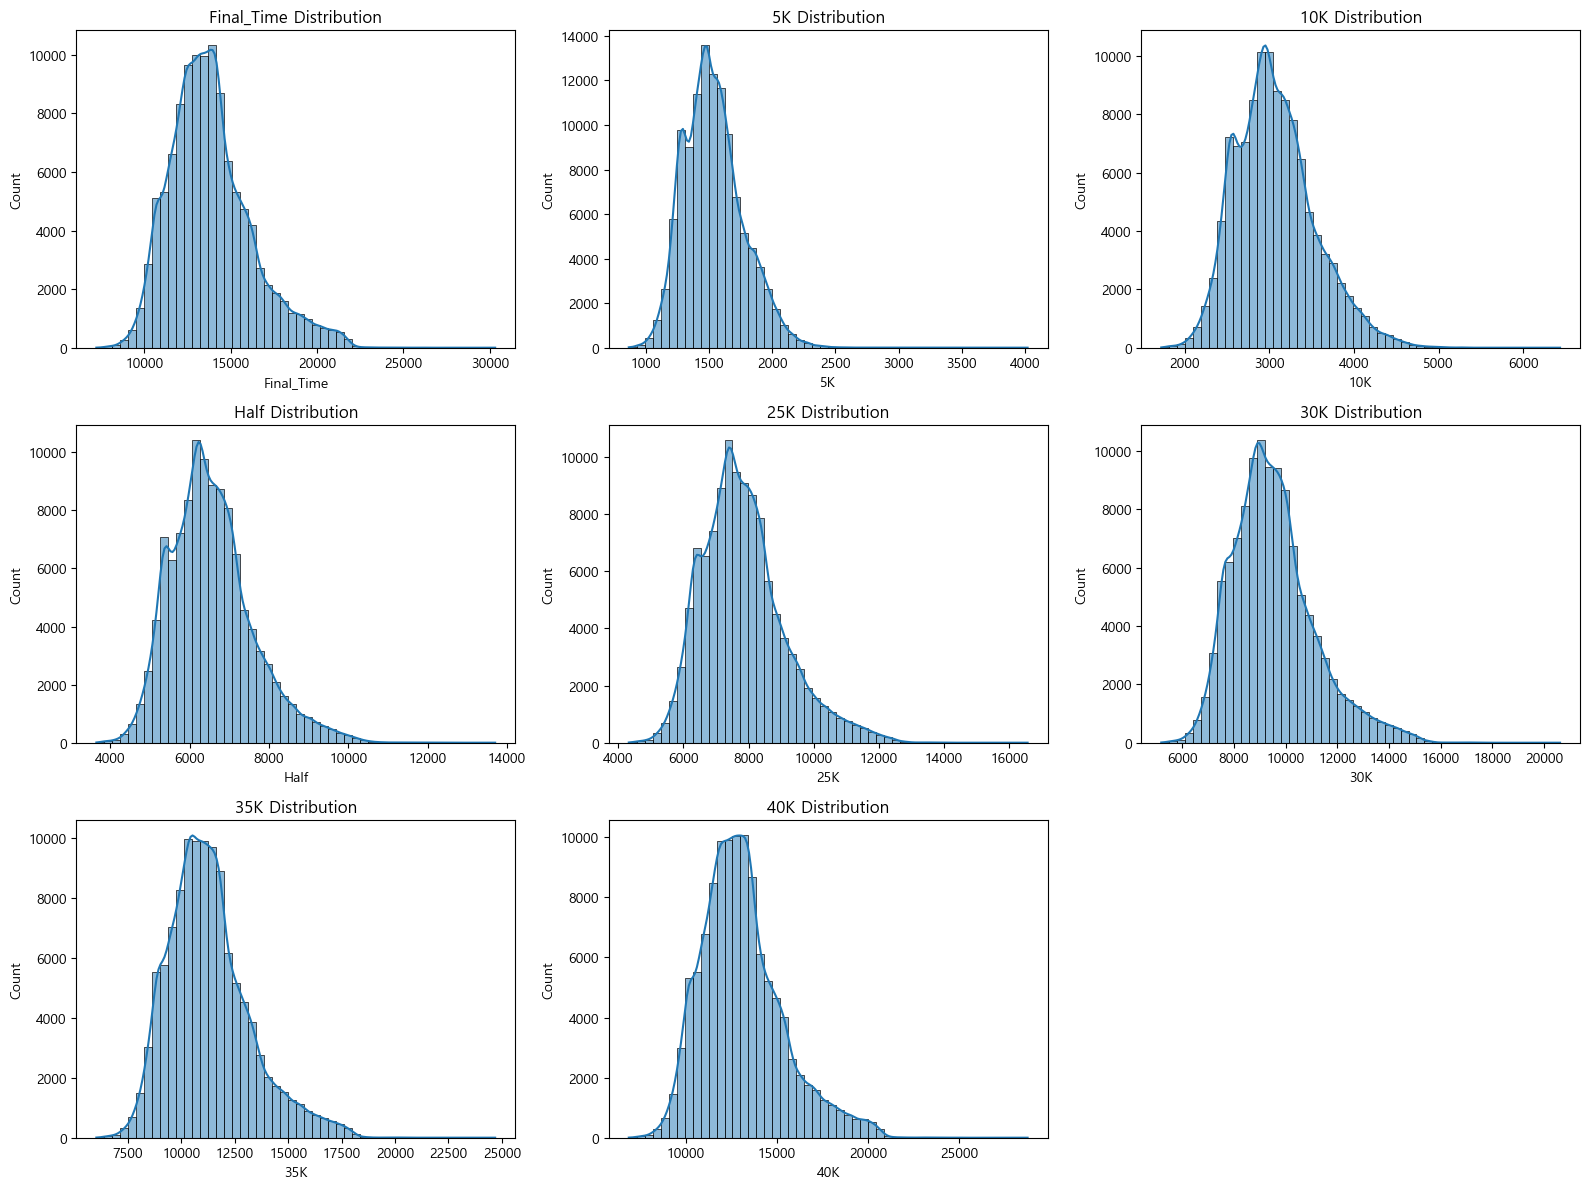

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 깨짐 방지 (필요시)
# plt.rcParams['font.family'] = 'AppleGothic' # macOS
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows

# 주요 시간 관련 변수 시각화
time_cols = ['Final_Time', '5K', '10K', 'Half', '25K', '30K', '35K', '40K']

plt.figure(figsize=(16, 12))
for i, col in enumerate(time_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


## 4. Final_Time과 각 구간 페이스(5p~40p) 간 상관관계 분석
- 최종 기록(Final_Time)과 각 구간별 페이스 간의 Pearson 상관계수를 구합니다.
- 어떤 구간의 페이스가 최종 기록에 가장 큰 영향을 주는지 파악할 수 있습니다.


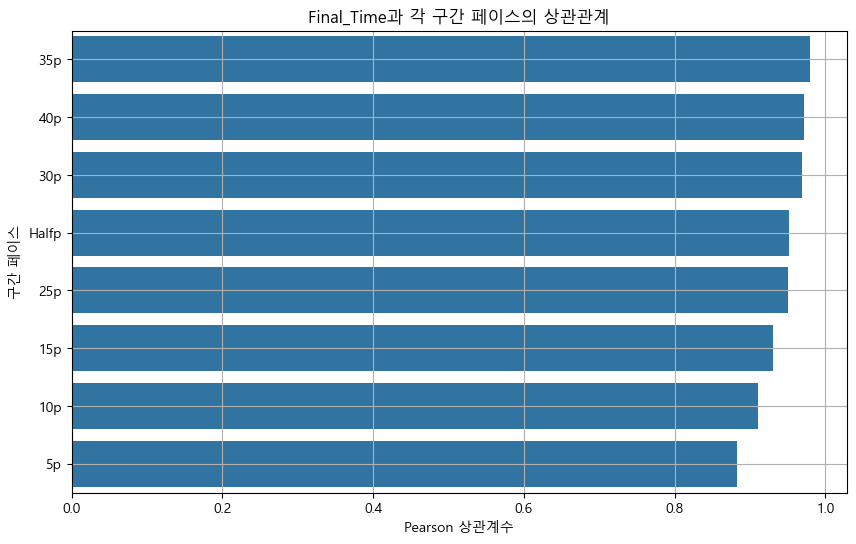

In [67]:
# 분석 대상 컬럼
pace_cols = ['5p', '10p', '15p', 'Halfp', '25p', '30p', '35p', '40p']

# Final_Time과의 상관계수
correlations = df[pace_cols + ['Final_Time']].corr()['Final_Time'].drop('Final_Time')
correlations = correlations.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Final_Time과 각 구간 페이스의 상관관계')
plt.xlabel('Pearson 상관계수')
plt.ylabel('구간 페이스')
plt.grid(True)
plt.show()


## 5. 성별 및 연령대별 평균 페이스 분석
- 각 성별(M/F)과 연령대(Age_group) 조합별로 평균 구간 페이스를 시각화합니다.
- 어떤 그룹이 어떤 구간에서 더 빠르거나 느린지 확인할 수 있습니다.


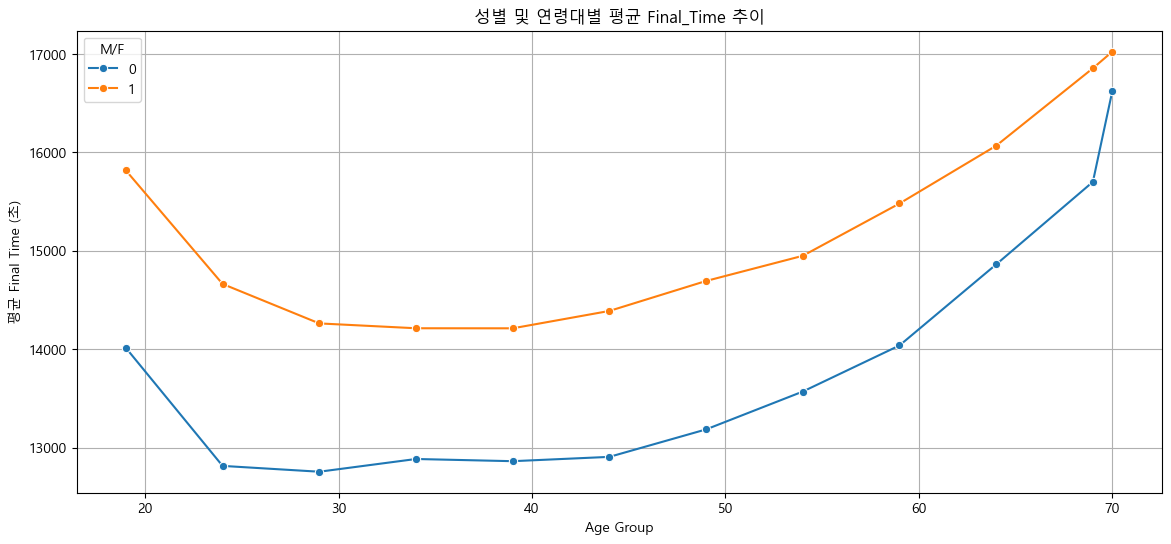

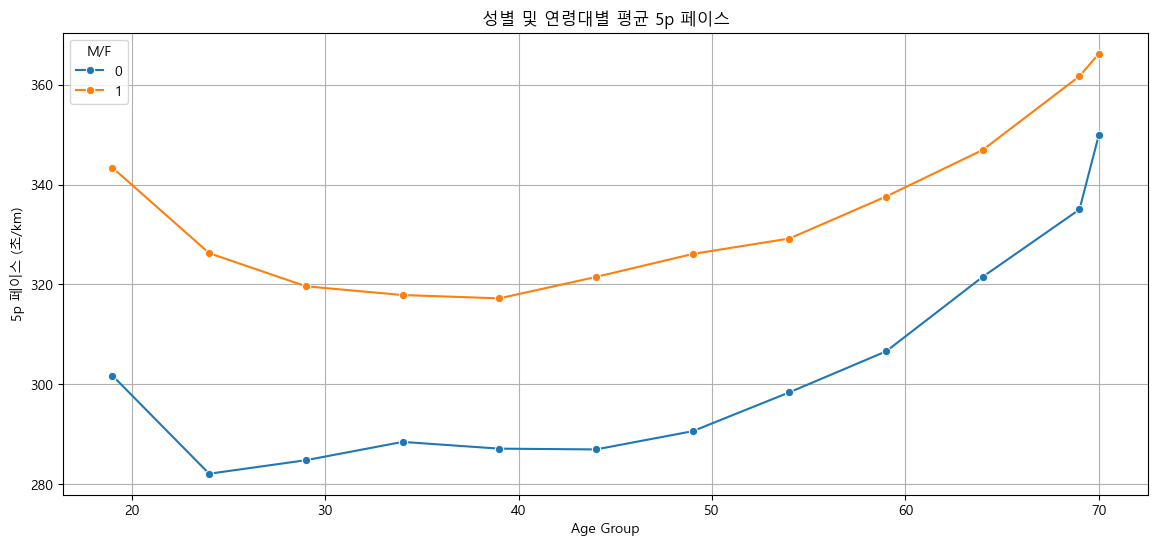

In [68]:
# 그룹별 평균 페이스 계산
grouped = df.groupby(['M/F', 'Age_group'])[
    ['Final_Time', '5p', '10p', '15p', 'Halfp', '25p', '30p', '35p', '40p']
].mean().reset_index()


# 시각화
plt.figure(figsize=(14, 6))
sns.lineplot(data=grouped, x='Age_group', y='Final_Time', hue='M/F', marker='o')
plt.title('성별 및 연령대별 평균 Final_Time 추이')
plt.xlabel('Age Group')
plt.ylabel('평균 Final Time (초)')
plt.grid(True)
plt.show()

# 구간별 평균 페이스도 시각화 (예: 5p만 먼저 보기)
plt.figure(figsize=(14, 6))
sns.lineplot(data=grouped, x='Age_group', y='5p', hue='M/F', marker='o')
plt.title('성별 및 연령대별 평균 5p 페이스')
plt.xlabel('Age Group')
plt.ylabel('5p 페이스 (초/km)')
plt.grid(True)
plt.show()


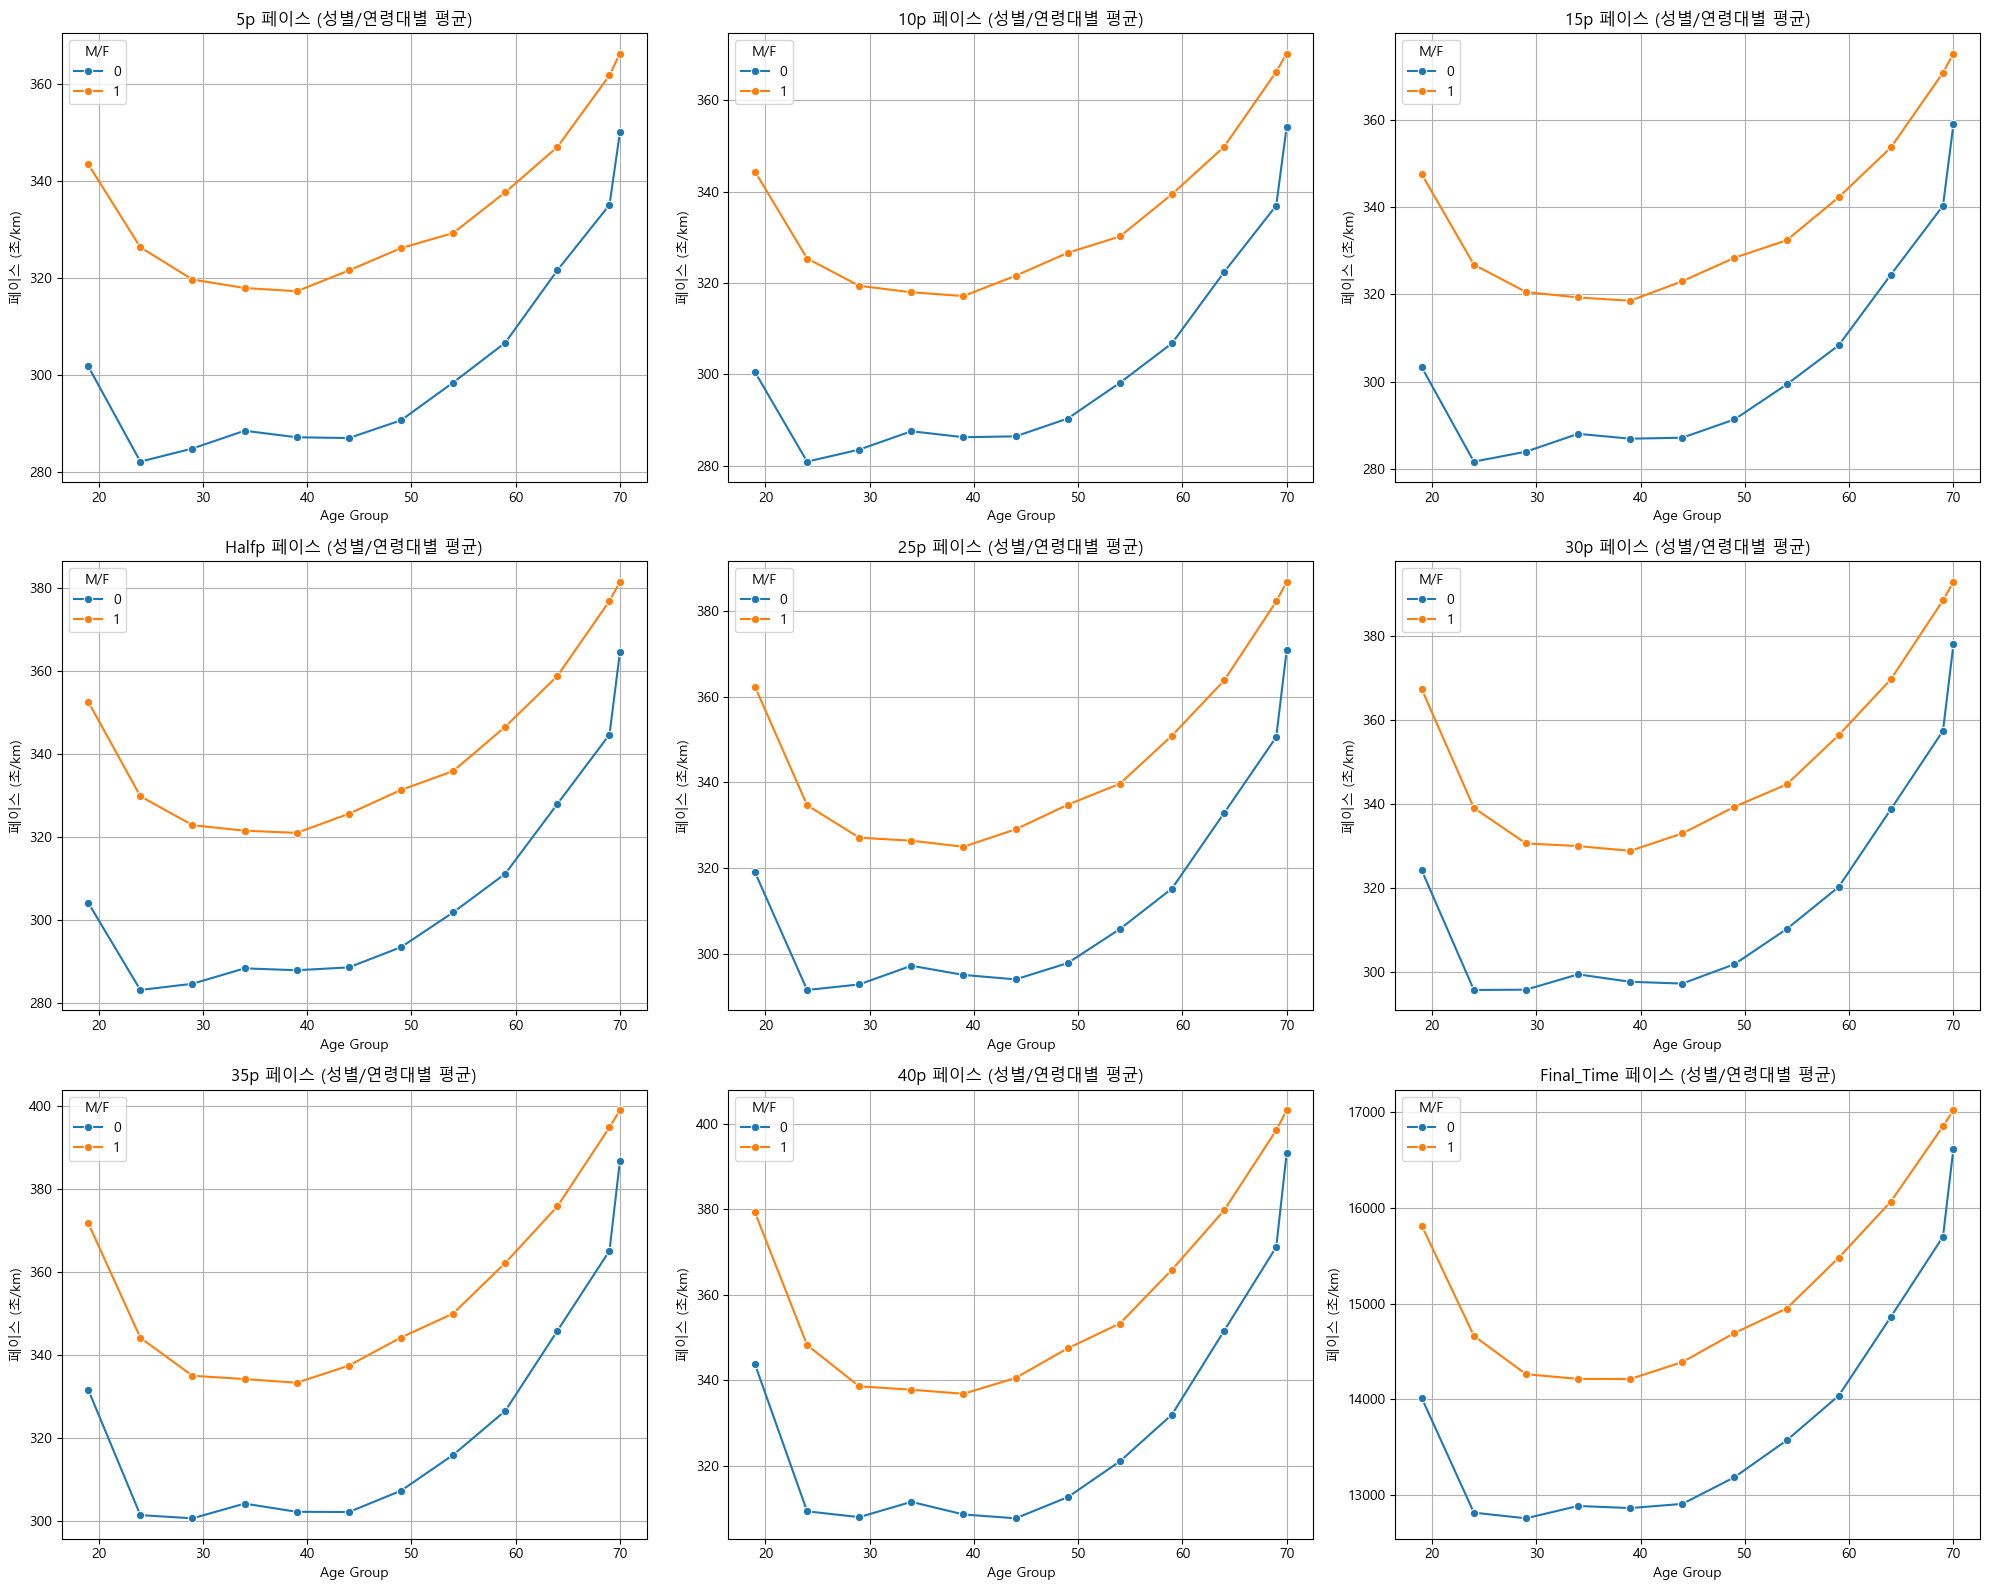

In [69]:
# 구간 페이스 컬럼
pace_cols = ['5p', '10p', '15p', 'Halfp', '25p', '30p', '35p', '40p', 'Final_Time']

# Final_Time 포함하여 그룹별 평균 계산
grouped = df.groupby(['M/F', 'Age_group'])[pace_cols].mean().reset_index()

# 시각화: 구간별 페이스 subplot
plt.figure(figsize=(20, 16))
for i, col in enumerate(pace_cols):
    plt.subplot(3, 3, i + 1)
    sns.lineplot(data=grouped, x='Age_group', y=col, hue='M/F', marker='o')
    plt.title(f'{col} 페이스 (성별/연령대별 평균)')
    plt.xlabel('Age Group')
    plt.ylabel('페이스 (초/km)')
    plt.grid(True)

plt.tight_layout()
plt.show()

### 5-1. 여성과 달리 남성 20~40세 사이에 나타난 V모양에 대한 분석
- ...


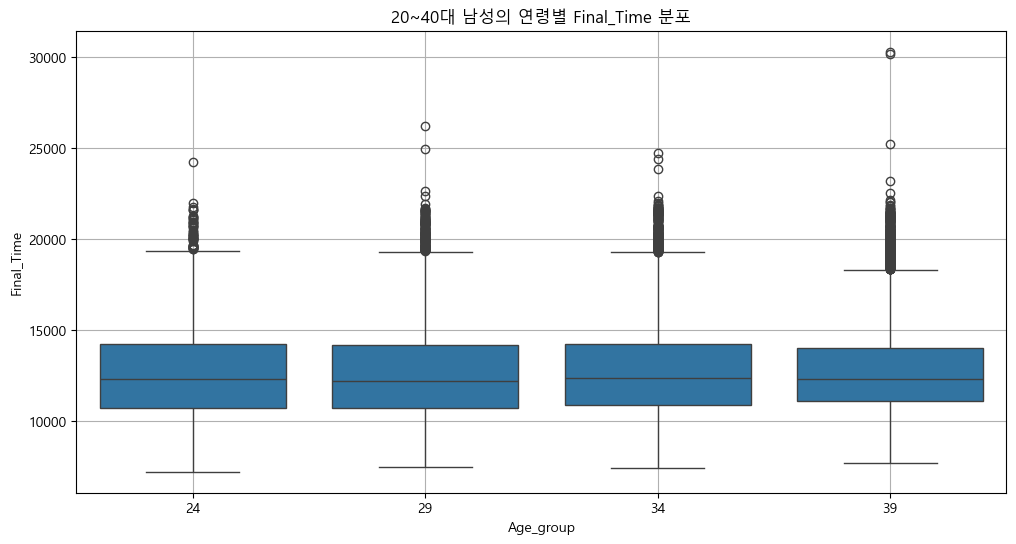

In [70]:
# 남성(M/F=0), 연령 20~40대 범위만
subset = df[(df['M/F'] == 0) & (df['Age_group'].between(20, 40))]

subset['Age_group'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='Age_group', y='Final_Time')
plt.title('20~40대 남성의 연령별 Final_Time 분포')
plt.grid(True)
plt.show()

#### 여성 버전

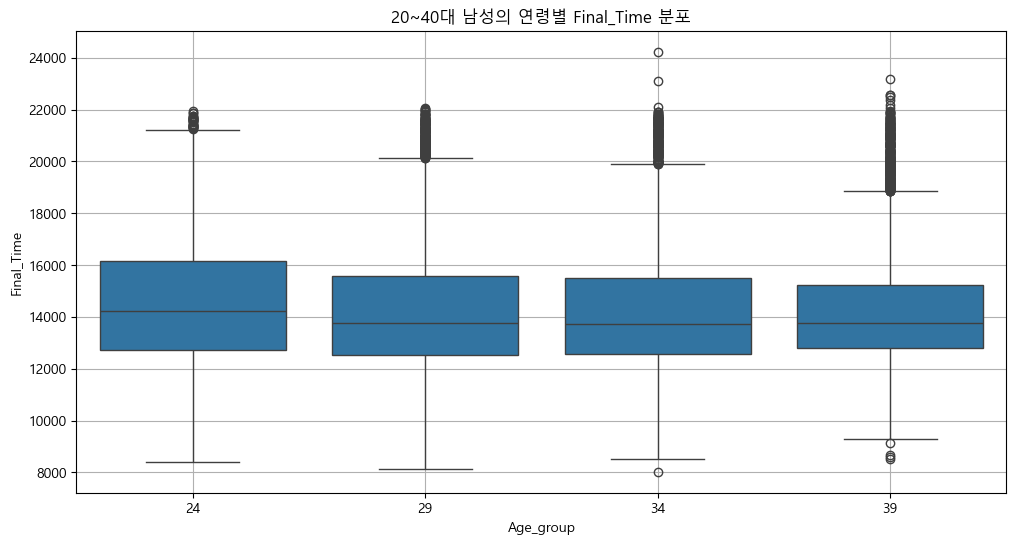

In [78]:
# 여성(M/F=1), 연령 20~40대 범위만
subset = df[(df['M/F'] == 1) & (df['Age_group'].between(20, 40))]

subset['Age_group'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='Age_group', y='Final_Time')
plt.title('20~40대 남성의 연령별 Final_Time 분포')
plt.grid(True)
plt.show()

- 특정 연령대의 데이터가 적어서 왜곡됐을 가능성

In [71]:
df[df['M/F'] == 0]['Age_group'].value_counts().sort_index()


Age_group
19      141
24     2260
29     6242
34     8529
39     9086
44     9512
49    10192
54     7962
59     5740
64     3479
69     1450
70      596
Name: count, dtype: int64

- 여성 버전

In [79]:
df[df['M/F'] == 1]['Age_group'].value_counts().sort_index()

Age_group
19     109
24    3001
29    7711
34    7016
39    7548
44    7908
49    7104
54    4701
59    2473
64    1224
69     371
70     134
Name: count, dtype: int64

- 24세 고수들이 많은가?

In [102]:
elite = df[(df['M/F'] == 0) & (df['Final_Time'] < 10800)]
elite['Age_group'].value_counts().sort_index()

Age_group
19      18
24     592
29    1684
34    1982
39    1635
44    1274
49     757
54     349
59     122
64      25
69       4
70       6
Name: count, dtype: int64

- 여성 버전

In [103]:
elite = df[(df['M/F'] == 1) & (df['Final_Time'] < 10800)]
elite['Age_group'].value_counts().sort_index()

Age_group
19      1
24     57
29    206
34    159
39     99
44     82
49     36
54      9
59      2
64      1
Name: count, dtype: int64

- sub-3 달성률

In [88]:
subset_m = df[df['M/F'] == 0].copy()  # 🔑 먼저 .copy() 사용!
subset_m.loc[:, 'Sub3'] = subset_m['Final_Time'] < 10800 # 3시간 = 10800초
sub3_ratio_m = subset_m.groupby('Age_group')['Sub3'].mean().sort_index()
# print(sub3_ratio_m)

- 여성 버전

In [89]:
subset_w = df[df['M/F'] == 1].copy()  # 🔑 먼저 .copy() 사용!
subset_w.loc[:, 'Sub3'] = subset_w['Final_Time'] < 10800 # 3시간 = 10800초
sub3_ratio_w = subset_w.groupby('Age_group')['Sub3'].mean().sort_index()
# print(sub3_ratio_w)

- 남성 연령대별 Sub3 달성률 시각화  
Sub3 (3시간 이내 완주) 비율을 연령대별로 시각화합니다.  
특정 연령대에서 엘리트 러너 비율이 유난히 높은지를 확인할 수 있습니다.


C:\Users\juhye\AppData\Local\Temp\ipykernel_21740\2885067166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub3_ratio_m.index, y=sub3_ratio_m.values, palette='Blues_d')


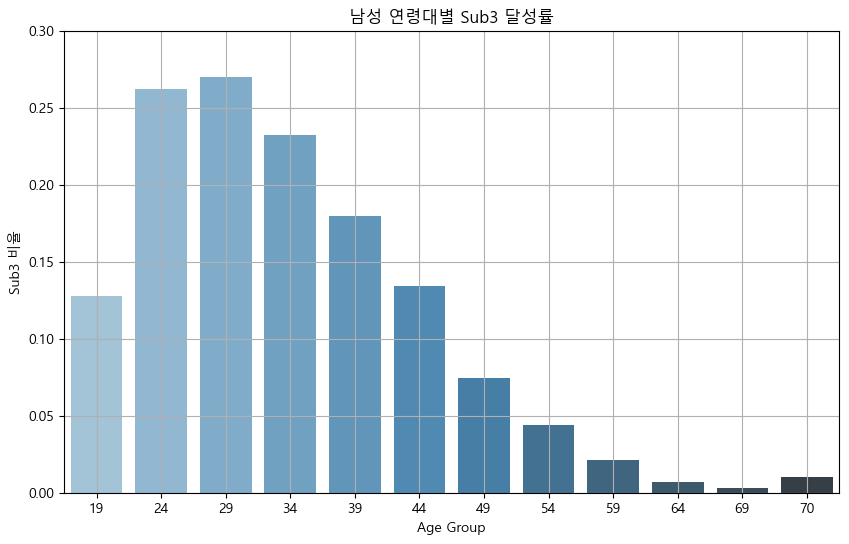

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sub3_ratio_m.index, y=sub3_ratio_m.values, palette='Blues_d')
plt.title('남성 연령대별 Sub3 달성률')
plt.xlabel('Age Group')
plt.ylabel('Sub3 비율')
plt.ylim(0, 0.3)
plt.grid(True)
plt.show()

- 여성 버전

C:\Users\juhye\AppData\Local\Temp\ipykernel_21740\4164967895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub3_ratio_w.index, y=sub3_ratio_w.values, palette='Blues_d')


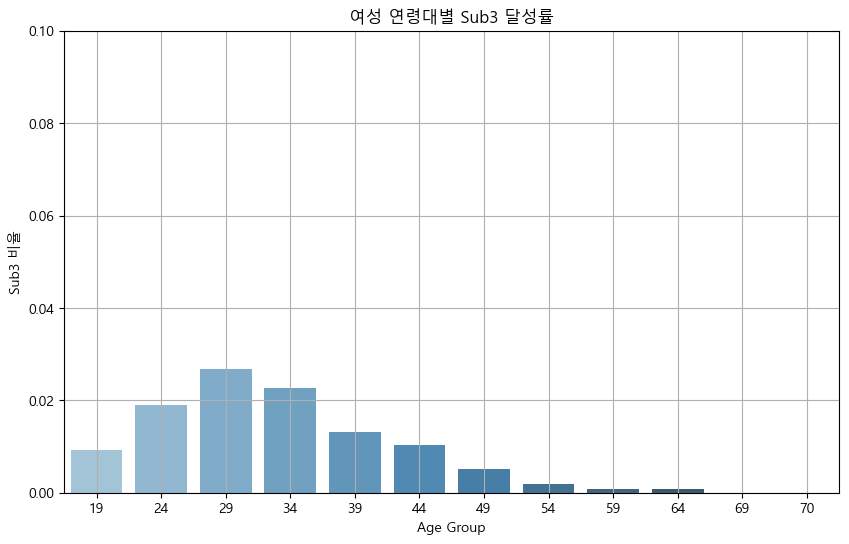

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sub3_ratio_w.index, y=sub3_ratio_w.values, palette='Blues_d')
plt.title('여성 연령대별 Sub3 달성률')
plt.xlabel('Age Group')
plt.ylabel('Sub3 비율')
plt.ylim(0, 0.1)
plt.grid(True)
plt.show()

#### 19~34세 구간에서 V모양을 그린 이유
- 24세, 29세 sub-3의 비율이 높다. -> 기록이 급하강한 이유
- [24세<->29세] 24세의 최고기록이 더 좋다. -> 24세의 sub-3 비율이 더 낮지만, 29세보다 기록이 더 좋은 이유

## 6. 남녀 연령대별 평균 페이스 비교 (겹치기 그래프)
- 동일한 구간에 대해 성별을 나누지 않고 하나의 그래프에 겹쳐서 비교합니다.
- 남성과 여성의 패턴 차이를 직접적으로 확인할 수 있습니다.


- 남성

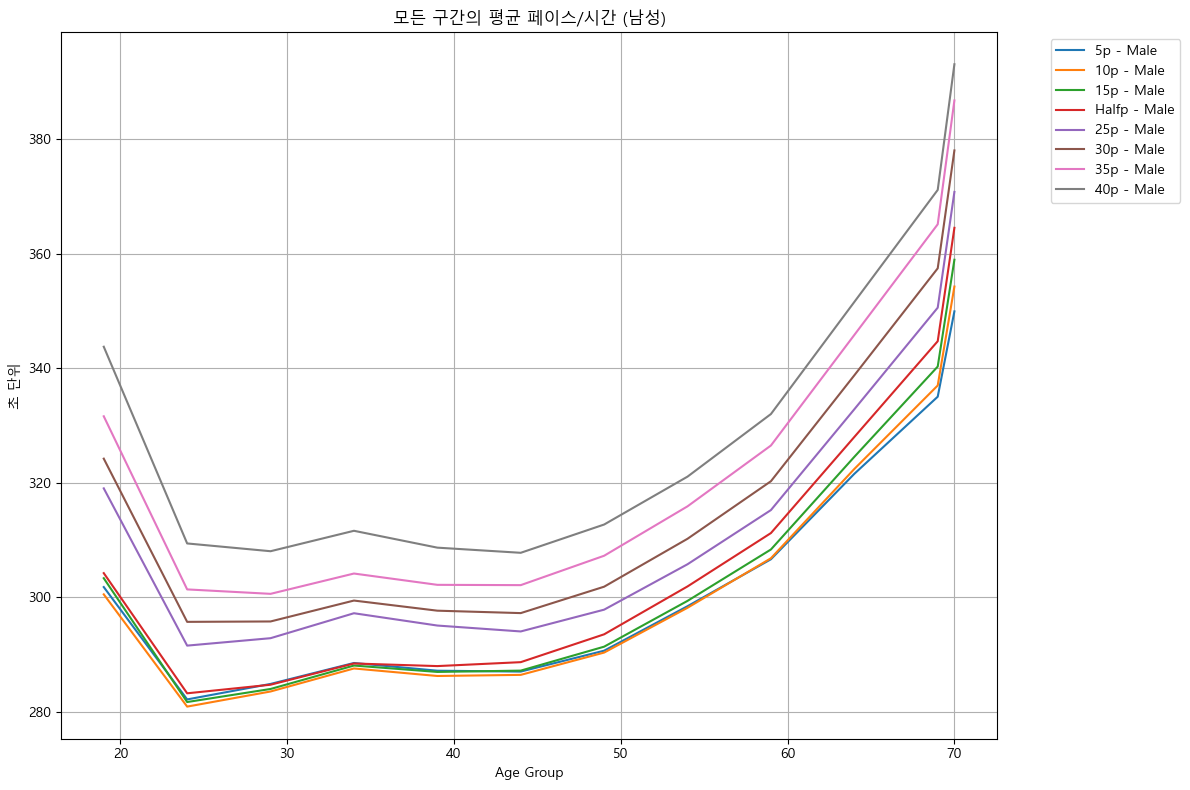

In [104]:
# 컬럼 목록
plot_cols = ['5p', '10p', '15p', 'Halfp', '25p', '30p', '35p', '40p']

# 성별별 그룹 평균
grouped = df.groupby(['M/F', 'Age_group'])[plot_cols].mean().reset_index()

# 시각화 시작
plt.figure(figsize=(12, 8))

# 성별별로 그리기
mf = 0
temp = grouped[grouped['M/F'] == mf]
for col in plot_cols:
    plt.plot(temp['Age_group'], temp[col], 
                label=f"{col} - {'Male' if mf == 0 else 'Female'}",
                linestyle='-' if mf == 0 else '--')

plt.title('모든 구간의 평균 페이스/시간 (남성)')
plt.xlabel('Age Group')
plt.ylabel('초 단위')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 남성의 페이스 변화
- 대체로 Half까지 페이스를 유지하다 점차적으로 페이스가 떨어진다.
- 연령이 오를수록 페이스를 유지하려는 힘이 약해진다.  
-> 70+세에 이를땐 처음부터 끝까지 고르게 페이스가 떨어진다. 

- 여성

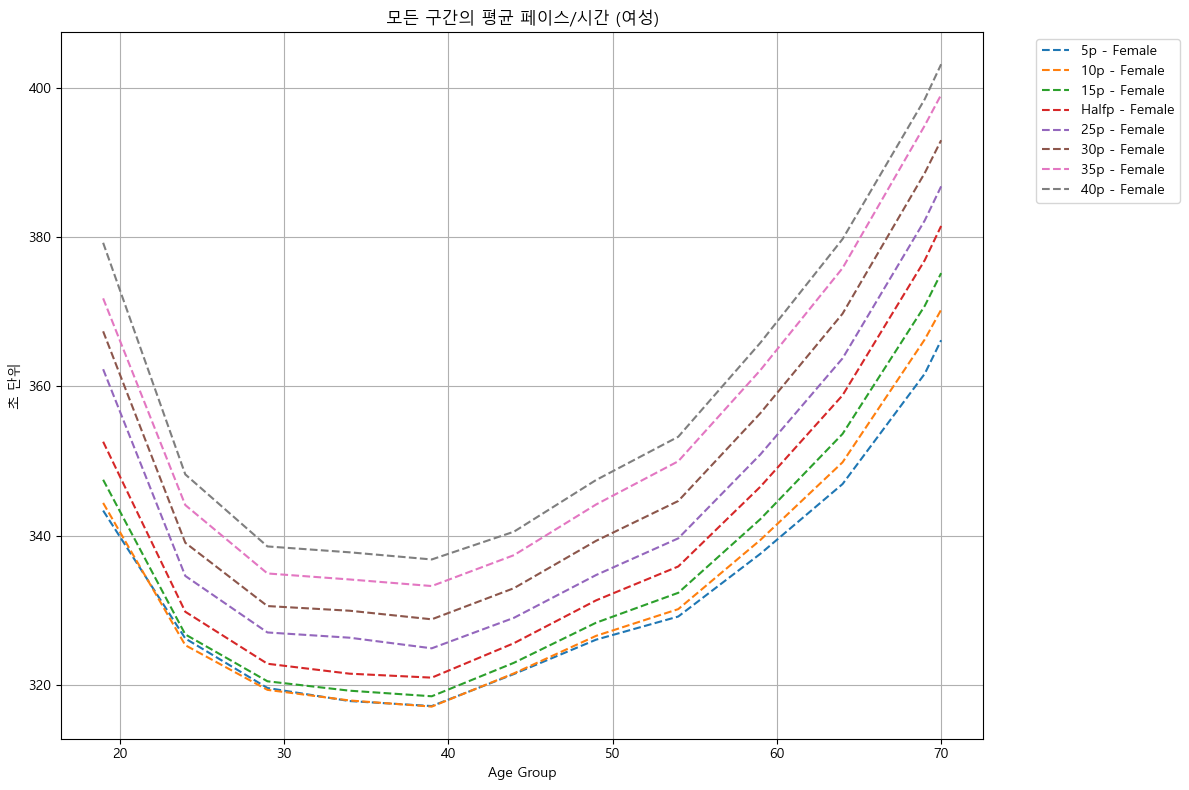

In [105]:
# 시각화 시작
plt.figure(figsize=(12, 8))

# 성별별로 그리기
mf = 1
temp = grouped[grouped['M/F'] == mf]
for col in plot_cols:
    plt.plot(temp['Age_group'], temp[col], 
                label=f"{col} - {'Male' if mf == 0 else 'Female'}",
                linestyle='-' if mf == 0 else '--')

plt.title('모든 구간의 평균 페이스/시간 (여성)')
plt.xlabel('Age Group')
plt.ylabel('초 단위')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 여성의 페이스 변화
- 페이스를 유지하려는 성향이 대체로 약하다.
- [24세,29세] -> 15km까지 힘이 유지된다.
- [~49세] -> 10km까지 힘이 유지된다.
- 64세부터 전 구간에 걸쳐 고르게 페이스가 떨어진다.